In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("6.jpg")

height, width, _ = img.shape

# Create an empty array to store the grayscale image

In [136]:
gray_img = np.zeros((height, width), dtype=np.uint8)


### Convert the image to grayscale using a for loop

In [137]:
for i in range(height):
    for j in range(width):
        # Compute the mean of the BGR channels for each pixel
        gray_img[i][j] = np.mean(img[i][j])

# Compute the mean along the channel axis (axis=2 for BGR or axis=-1 for RGB)
# gray_img = np.mean(img, axis=2, dtype=np.uint8)

### Create a binary image (black and white) based on thresholding


In [138]:
threshold = 127
bin_img = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if gray_img[i][j] > threshold:  # Compare individual pixel value
            bin_img[i][j] = 255  # Set white pixel

# bin_img = np.where(gray_img>threshold,255,0).astype(np.uint8)

### Visualize results

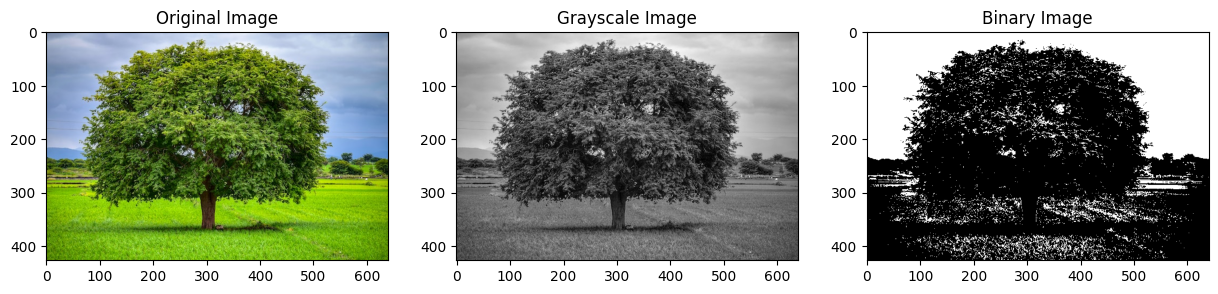

In [139]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(1, 3, 3)
plt.imshow(bin_img, cmap='gray')
plt.title("Binary Image")

plt.show()


### Add, Substraction, AND, OR Operation

/tmp/ipykernel_3816/2799450069.py:11: RuntimeWarning: overflow encountered in scalar subtract
  res_img[i][j] = (img2[i][j] - resize_img3[i][j])


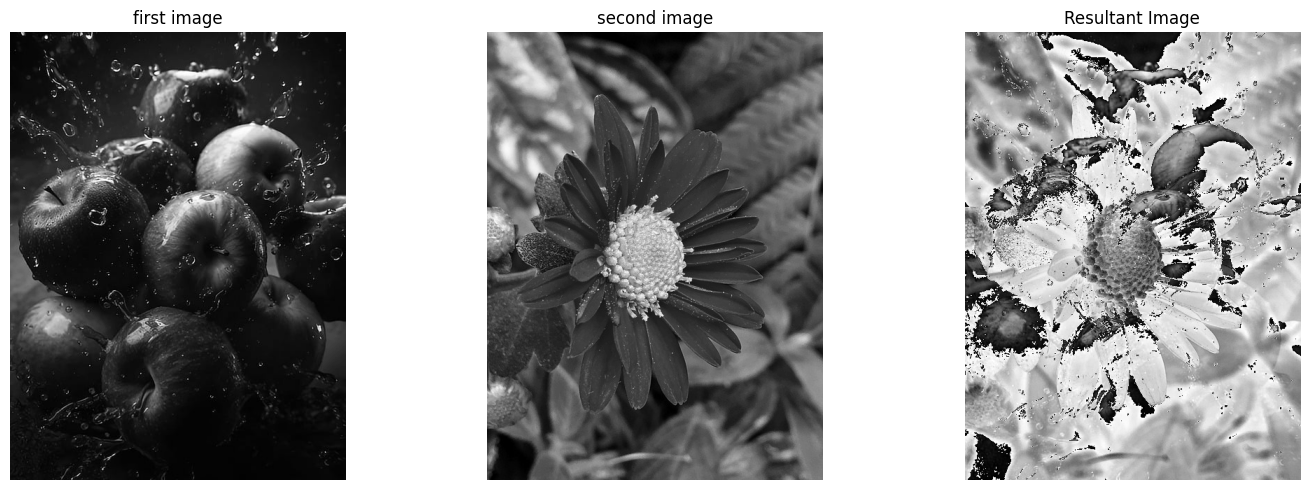

In [140]:
# Read two grayscale images
img2 = cv2.imread("1.jpg", 0)
img3 = cv2.imread("5.jpg", 0)

resize_img3 = cv2.resize(img3, (img2.shape[1], img2.shape[0]))

res_img = np.zeros_like(img3)

for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        res_img[i][j] = (img2[i][j] - resize_img3[i][j])


res_img = np.clip(res_img, 0, 255)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('first image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img3, cmap='gray')
plt.title('second image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(res_img, cmap='gray')
plt.title('Resultant Image')
plt.axis('off')

plt.tight_layout()

plt.show()

### Add Boundary/Border

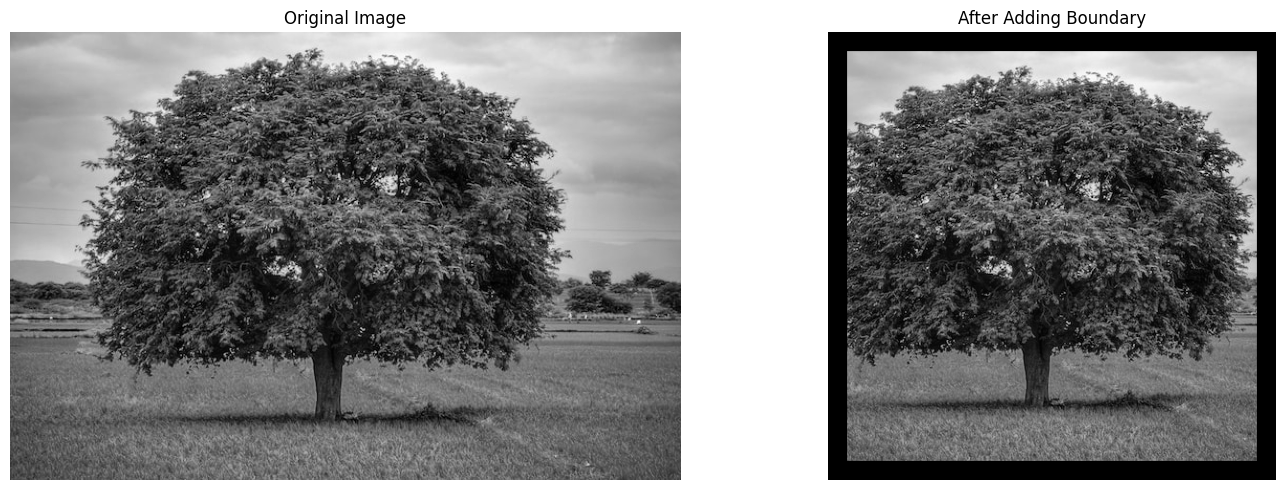

In [141]:
height, width = gray_img.shape
square_size = min(height, width)

# Calculate the cropping parameters
crop_x = (width - square_size) // 2
crop_y = (height - square_size) // 2

# Crop the image to make it square
cropped_img = gray_img[crop_y:crop_y+square_size, crop_x:crop_x+square_size]


# Read the cropped grayscale image
boundary_img = cropped_img

# Define boundary size
boundary_size = 20

# Get the dimensions of the boundary image
height, width = boundary_img.shape

# Determine the maximum dimension
max_dim = max(height, width)

# Create a square image with padding
square_img = np.zeros((max_dim + 2 * boundary_size, max_dim + 2 * boundary_size), dtype=np.uint8)

# Calculate padding for height and width
padding_height = (max_dim - height) // 2
padding_width = (max_dim - width) // 2


# Assign the content of boundary_img to the center of square_img with padding
square_img[boundary_size + padding_height: boundary_size + padding_height + height, 
           boundary_size + padding_width: boundary_size + padding_width + width] = boundary_img

# Display the result with equal subplot sizes
plt.figure(figsize=(15, 5))  # Set the size of the figure
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(square_img, cmap='gray')
plt.title('After Adding Boundary')
plt.axis('off')
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

### Add diagonal value and assign it to zero so that it will be black

total sum of the diagonal value is :  40663


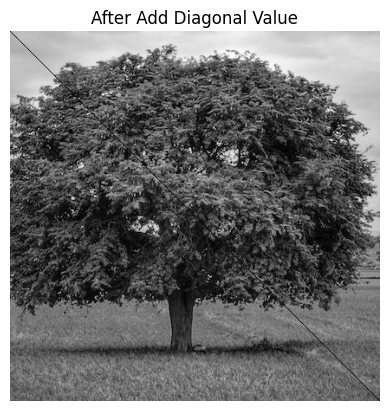

In [142]:
sum = 0
h, w = boundary_img.shape
m = min(h, w)
diagonal_img = np.zeros((m, m), dtype=np.uint8)

for i in range (diagonal_img.shape[0]):
    for j in range(diagonal_img.shape[1]):
        if i == j:
            sum += boundary_img[i][j]
            diagonal_img[i][j] = 0
        else:
          
          diagonal_img[i][j] = boundary_img[i][j]


print("total sum of the diagonal value is : ", sum)
plt.imshow(diagonal_img, cmap='gray')
plt.title('After Add Diagonal Value')
plt.axis('off')

plt.show()

### Contrast image

In [143]:
# contrast_img = np.zeros_like(gray_img, dtype=np.float64)

# r1 = int(input('Enter r1 : '))
# r2 = int(input('Enter r2 : '))
# s1 = int(input('Enter s1 : '))
# s2 = int(input('Enter s2 : '))

# a = s1 / r1
# b = (s2 - s1) / (r2 - r1)
# c = (255 - s2) / (255 - r2)

# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#       if gray_img[i][j] < r1:
#          contrast_img[i][j] = a * contrast_img[i][j]
#       elif gray_img[i][j] < r2:
#          contrast_img[i][j] = b * (gray_img[i][j] - r1) + s1
#       else:
#          contrast_img[i][j] = c * (gray_img[i][j] - r2) + s2


# contrast_img = np.clip(contrast_img, 0, 255).astype(np.uint8)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(gray_img, cmap='gray')
# plt.title('Original Grayscale Image')
# plt.subplot(1, 2, 2)
# plt.imshow(contrast_img, cmap='gray')
# plt.title('Contrast Image')

# plt.show()




### Find center point

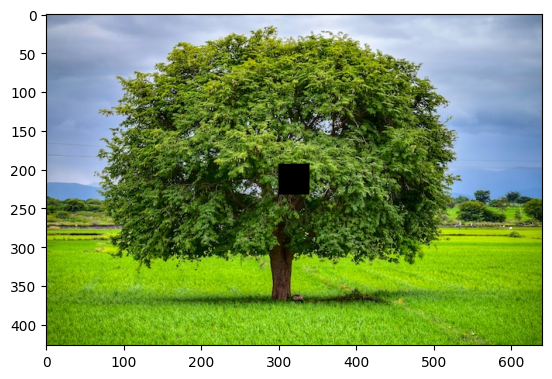

In [144]:
def find_center_point(img, radius):
    h, w, _ = img.shape
    center_point = (h//2, w//2)
    center_img = np.zeros((radius, radius))
    img[center_point[0]-radius:center_point[0]+radius, center_point[1]-radius:center_point[1]+radius] = 0
    return img
plt.imshow( cv2.cvtColor(find_center_point(img, 20), cv2.COLOR_BGR2RGB) )

### Histogram & Histogram Equalization

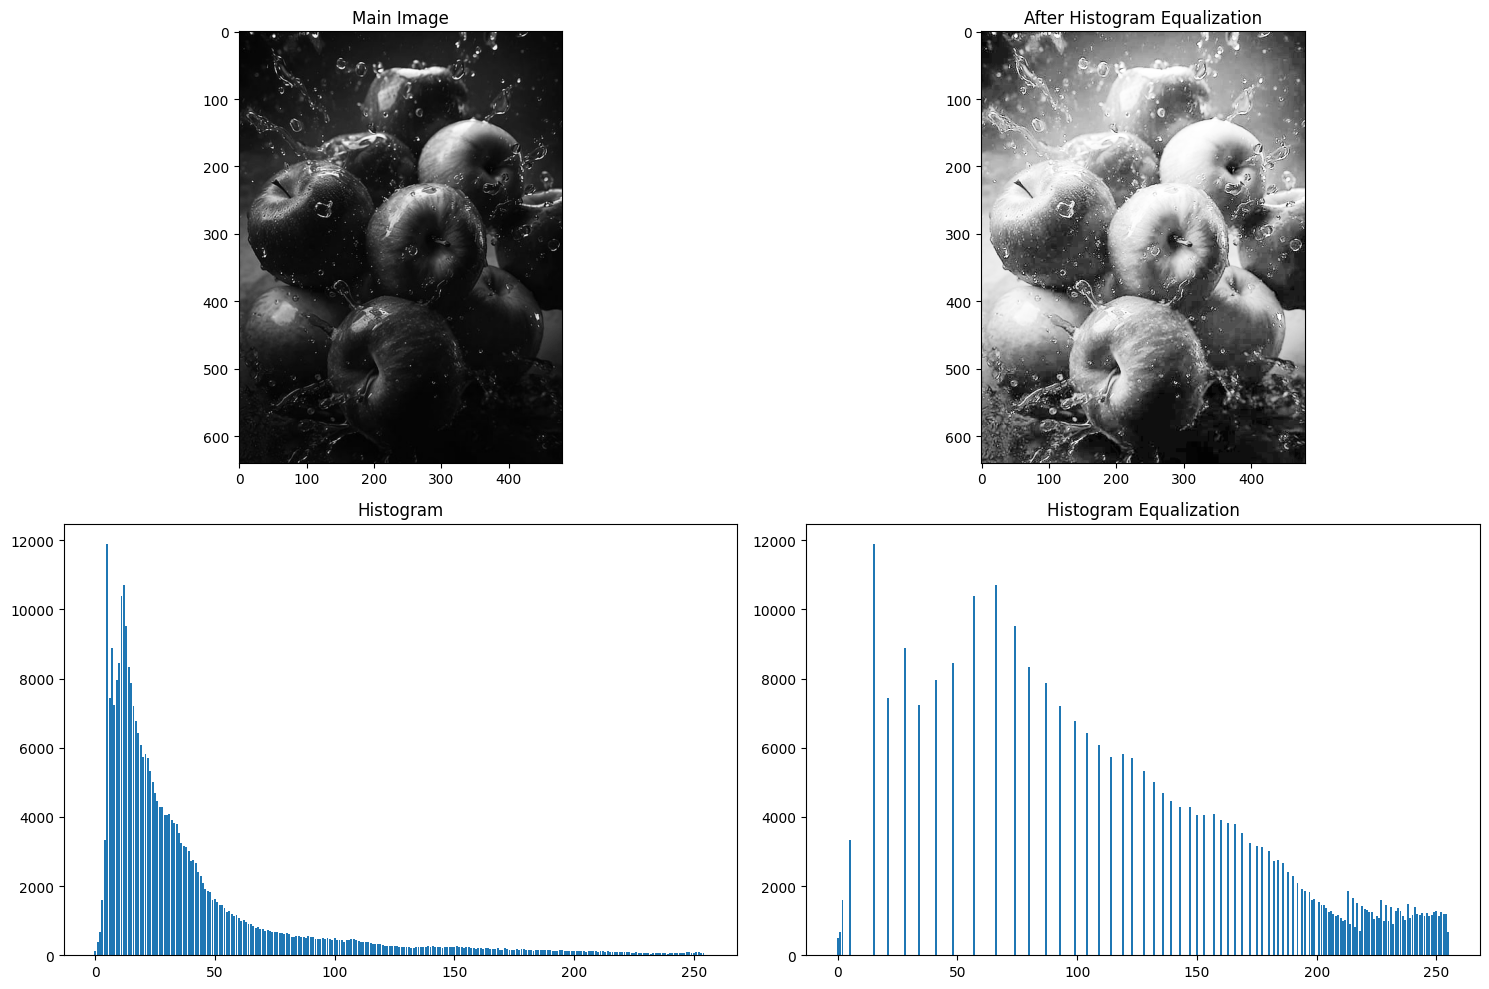

In [145]:
# convert image to gray scale. take mean of all channels (red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histogram(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i,j]] += 1
    return h

def bit_prk(h):
    return h / np.sum(h)

def prk_cdf(prk):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = np.sum(prk[:i+1])
    return cdf

def hist_equalization(cdf, nrk):
    hist_equalization_bit = np.round(cdf * 255).astype(np.uint8)
    hist_nrk = np.zeros(256)
    for i in range(256):
        hist_nrk[hist_equalization_bit[i]] += nrk[i]
    return hist_nrk

def plot_histogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = plt.imread('1.jpg')
gray_img = gray_image(img)

nrk = gray_level_histogram(gray_img)
prk = bit_prk(nrk)
cdf = prk_cdf(prk)
new_img = hist_equalization(cdf, nrk)

cdfTx = np.round(cdf * 255).astype(np.uint8)

height, width, _ = img.shape
equi_img = np.zeros((height, width), "uint8")

for i in range(height):
    for j in range(width):
        equi_img[i][j] = cdfTx[gray_img[i][j]]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].set_title('Main Image')
axs[0][0].imshow(gray_image(img), cmap='gray')
axs[0][1].set_title('After Histogram Equalization')
axs[0][1].imshow(equi_img, cmap='gray')
axs[1][0].set_title('Histogram')
axs[1][0].bar( np.arange(256), nrk )
axs[1][1].set_title('Histogram Equalization')
axs[1][1].bar( np.arange(256), new_img )
plt.tight_layout()
plt.show()


## Filtering (smoothing and sharpening)

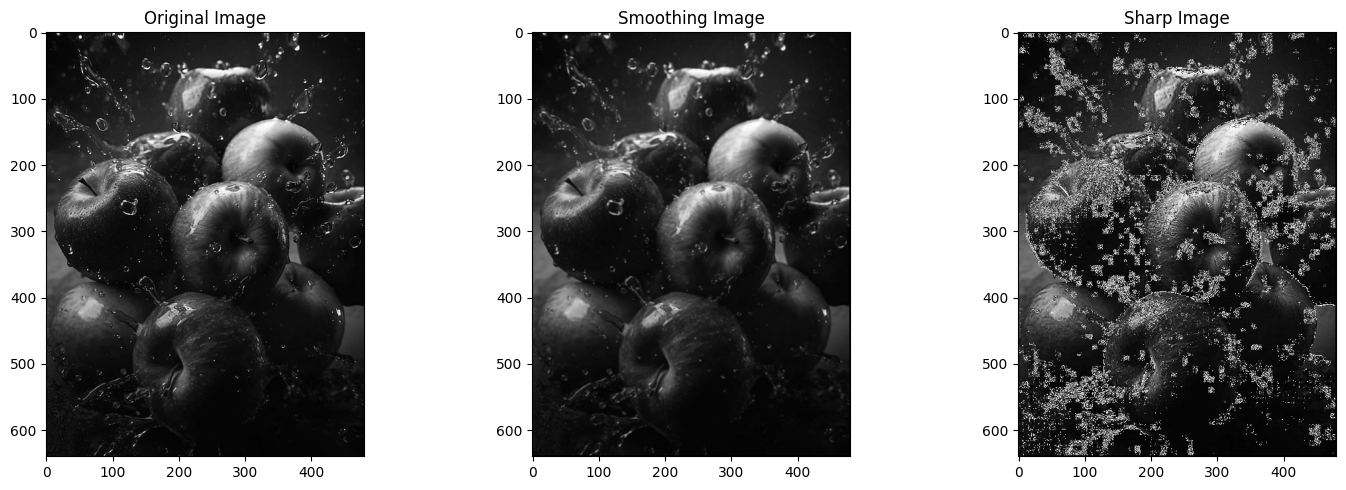

In [146]:
smooth_img = np.zeros_like(gray_img)
sharp_img =  np.zeros_like(gray_img)

smooth_kernel = np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]]) / 16

sharp_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, - 1, 0]])

for i in range(1, gray_img.shape[0] - 1):
    for j in range(1, gray_img.shape[1] - 1):
        smooth_img[i][j] = np.sum(gray_img[i - 1 : i + 2, j - 1: j + 2] * smooth_kernel)


for i in range(1, gray_img.shape[0] - 1):
    for j in range(1, gray_img.shape[1] - 1):
        sharp_img[i][j] = np.sum(gray_img[i- 1 : i + 2, j - 1 : j + 2] * sharp_kernel)



smooth_img = np.clip(smooth_img, 0, 255).astype(np.uint8)
sharp_img = np.clip(sharp_img, 0, 255).astype(np.uint8)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(smooth_img, cmap='gray')
plt.title('Smoothing Image')
plt.subplot(1, 3, 3)
plt.imshow(sharp_img, cmap='gray')
plt.title('Sharp Image')
plt.tight_layout()
plt.show()



### Morphological

In [147]:
img = plt.imread('7.png')
gray_image=np.mean(img, axis=-1).astype(np.uint8)

In [148]:
# Erosion
def erosion(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    new_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = np.max(img[i:i + kernel_height, j:j + kernel_width] * kernel)
    return new_img.astype(np.uint8)

In [149]:
# dilation
def dilation(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    new_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = np.min(img[i:i + kernel_height, j:j + kernel_width] * kernel)
    return new_img.astype(np.uint8)

In [150]:
# create subplot to show gray image, erosion and dilation
def show_image(img, kernel):
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(img, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(erosion(img, kernel), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Erosion')
    axs[2].imshow(dilation(img, kernel), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Dilation')
    plt.show()

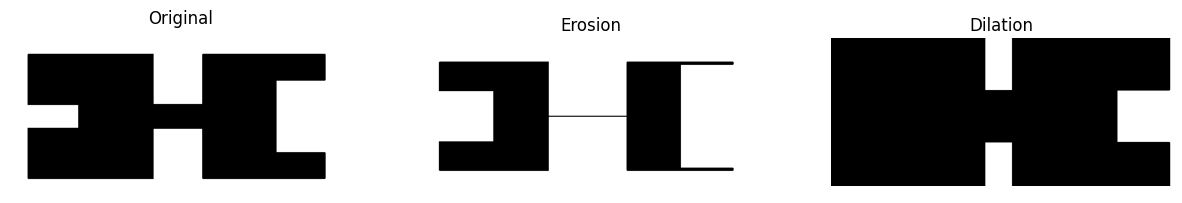

In [151]:
kernel = np.ones((47, 47))
show_image(gray_image, kernel)

In [152]:
# Opening
def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)

# Closing
def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)


# create subplot to show gray image, opening and closing
def show_image(img, kernel):
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(img, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(opening(img, kernel), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Opening')
    axs[2].imshow(closing(img, kernel), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Closing')
    plt.show()

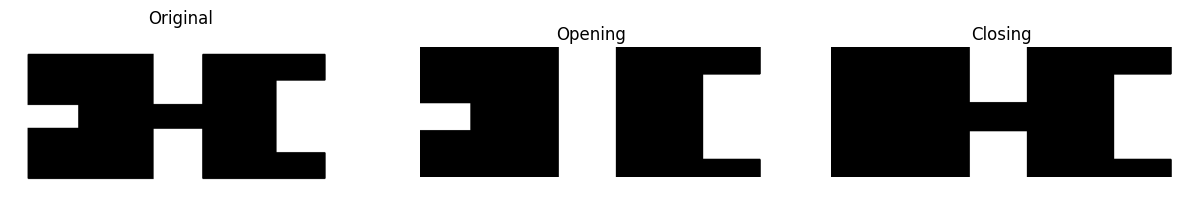

In [153]:
kernel = np.ones((50, 50))
show_image(gray_image, kernel)

### Line detection

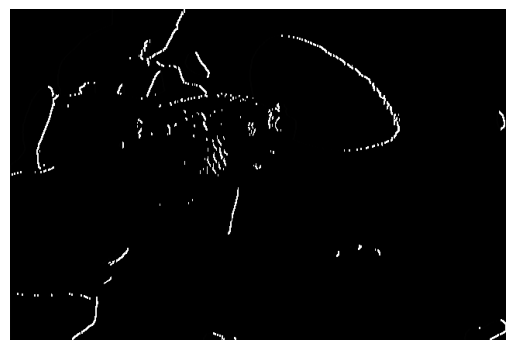

In [154]:
# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)

def add_padding(img, pad_width):
    return np.pad(img, pad_width, mode='constant')

# line detection using sobel filter
def sobel_filter(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3])
    return new_img.astype(np.uint8)

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('2.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
line_img = sobel_filter(bin_img)


show_image(line_img)

### Edge detection

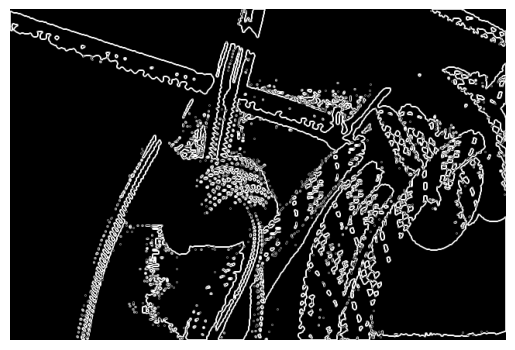

In [155]:
# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# edge detection 
def edge_detection(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
    sobel_filter_y = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.sqrt(np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3])**2 + np.sum(sobel_filter_y * padded_img[i:i + 3, j:j + 3])**2)
    return new_img.astype(np.uint8)


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('3.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
edge_img = edge_detection(bin_img)

show_image(edge_img)

### point detection

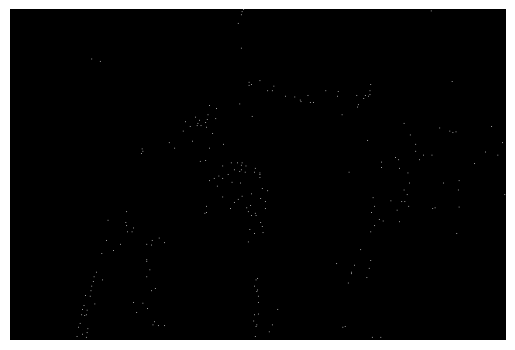

In [156]:
# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# point detection
def point_detection(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, 1]])
    sobel_filter_y = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.abs(np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3]))
    threshold = np.max(new_img) * 0.8
    new_img[new_img < threshold] = 0
    new_img[new_img >= threshold] = 255
    return new_img.astype(np.uint8)


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('3.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
point_img = point_detection(bin_img)

show_image(point_img)